In [1]:
import tidy3d as td
import numpy as np
import tidy3d.web as web

import matplotlib.pyplot as plt

In [2]:
freq0 = td.C_0/1.5
fwidth = 0.1*freq0

freqs = np.linspace(freq0-fwidth,freq0+fwidth,100)

Vacuum = td.Medium(
    name = 'Vacuum', 
)

planewave_0 = td.PlaneWave(
    name = 'planewave_0', 
    size = [td.inf, td.inf, 0], 
    source_time = td.GaussianPulse(freq0 =freq0, fwidth = fwidth, ), 
    direction = '+', 
)

diffractionmonitor_0 = td.DiffractionMonitor(
    name = 'DT', 
    center = [0, 0, 1], 
    size = [td.inf, td.inf, 0], 
    freqs = freqs, 
    normal_dir='-',
)

diffractionmonitor_0_Copy = td.DiffractionMonitor(
    name = 'DR', 
    center = [0, 0, -1], 
    size = [td.inf, td.inf, 0], 
    freqs = freqs, 
    normal_dir = '-'
)

fluxMonT = td.FluxMonitor(
    name = 'FT', 
    center = [0, 0, 0.5], 
    size = [td.inf, td.inf, 0], 
    freqs = freqs, 
)

fluxMonR = td.FluxMonitor(
    name = 'FR', 
    center = [0, 0, -0.5], 
    size = [td.inf, td.inf, 0], 
    freqs = freqs, 
    normal_dir = '-'
)



fieldMom = td.FieldMonitor(center = (0,0,0),
                           size = (0,td.inf,td.inf),
                           freqs = [freq0],
                           name = 'fieldMon',
                           )
sim = td.Simulation(
    size = [1, 1, 7], 
    boundary_spec = td.BoundarySpec(x = td.Boundary(plus = td.BlochBoundary(bloch_vec = 0), minus = td.BlochBoundary(bloch_vec = 0), ), y = td.Boundary(plus = td.BlochBoundary(bloch_vec = 0), minus = td.BlochBoundary(bloch_vec = 0), ), z = td.Boundary(plus = td.Absorber(num_layers=80), ), ), 
    grid_spec = td.GridSpec.auto(wavelength = 1.55, min_steps_per_wvl = 20), 
    run_time = 2.5851216749408594e-12,
    medium = Vacuum,
    sources = [planewave_0],
    monitors = [diffractionmonitor_0,diffractionmonitor_0_Copy,fieldMom,fluxMonT,fluxMonR],
    structures = [],
)


In [3]:
box = td.Box.from_bounds(rmin = [-99,-99,-99],rmax = [99,99,2]) 
structure = td.Structure(
    geometry = box, 
    medium= td.Medium(permittivity=3.5**2), 
)



def make_sim(theta,pol_angle = 0,norm = False):
    theta_rad = (np.pi/180)*theta
    pol_rad = (np.pi/180)*pol_angle

    planewave = td.PlaneWave(
        size = [td.inf, td.inf, 0], 
        source_time = td.GaussianPulse(freq0 = freq0, fwidth = fwidth), 
        direction = '+', 
        angle_theta=theta_rad,
        pol_angle=pol_rad
    )

    # Bloch boundaries.
    bloch_x = td.Boundary.bloch_from_source(
    source=planewave,
    domain_size=1,
    axis=0,
    medium=td.Medium(permittivity=1)
    )

    bloch_y = td.Boundary.bloch_from_source(
    source=planewave,
    domain_size=1,
    axis=1,
    medium=td.Medium(permittivity=1)
    )

    bspec = td.BoundarySpec(x=bloch_x, y=bloch_y, 
                z=td.Boundary.pml() if norm else td.Boundary(minus = td.PML(), plus = td.PECBoundary()))


    diffractionmonitor_0 = td.DiffractionMonitor(
        name = 'DT', 
        center = [0, 0, 1], 
        size = [td.inf, td.inf, 0], 
        freqs = freqs, 
        normal_dir='+' if norm else '-',
    )

    sim = td.Simulation(
        size = [1, 1, 8], 
        boundary_spec = bspec,
        grid_spec = td.GridSpec.auto(wavelength = 1.55, min_steps_per_wvl = 10),
        run_time = 1e-12,
        sources = [planewave],
        monitors = [diffractionmonitor_0,diffractionmonitor_0_Copy,fieldMom,fluxMonT,fluxMonR],
        structures = [],)

    return sim

sim = make_sim(0)

In [4]:
sim = make_sim(0,norm = False)
simN = make_sim(0,norm = True)

<AxesSubplot: title={'center': 'cross section at x=0.00 (μm)'}, xlabel='y (μm)', ylabel='z (μm)'>

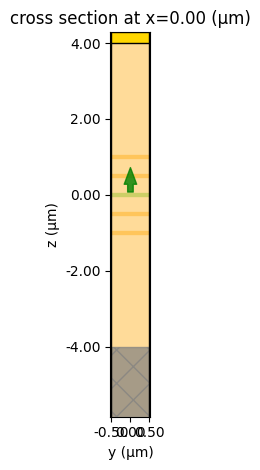

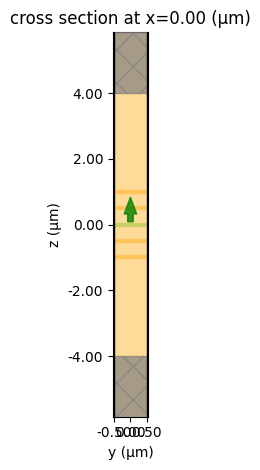

In [5]:
sim.plot(x=0)
simN.plot(x=0)

In [6]:
sim_data = web.run(sim,task_name='sim')
sim_dataN = web.run(simN,task_name='norm')

09:25:52 -03 Created task 'sim' with task_id                                    
             'fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=9124;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=668696;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34\taskId]8;;\]8;id=9124;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34\=]8;;\]8;id=96398;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34\fdve]8;;\]8;id=9124;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34\-8ce36297-0ad]8;;\
             ]8;id=9124;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8ce36297-0ad5-44c0-b074-75cf7c7a9b34\5-44c0-b074-75cf7c7a9b34']8;;\.

             Task folder: ]8;id=669934;https://tidy3d.simulation.cloud/folders/folder-2d594d1c-257b-417d-92d0-e6dcb36d63f0\'default']8;;\.

Output()

09:26:01 -03 Maximum FlexCredit cost: 0.025. Minimum cost depends on task       
             execution details. Use 'web.real_cost(task_id)' to get the billed  
             FlexCredit cost after a simulation run.

09:26:02 -03 status = success

Output()

09:26:04 -03 loading simulation from simulation_data.hdf5

             Created task 'norm' with task_id                                   
             'fdve-eec614bd-5298-4f36-ace8-41ee5f03046c' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=730571;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eec614bd-5298-4f36-ace8-41ee5f03046c\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=673193;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eec614bd-5298-4f36-ace8-41ee5f03046c\taskId]8;;\]8;id=730571;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eec614bd-5298-4f36-ace8-41ee5f03046c\=]8;;\]8;id=357413;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eec614bd-5298-4f36-ace8-41ee5f03046c\fdve]8;;\]8;id=730571;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eec614bd-5298-4f36-ace8-41ee5f03046c\-eec614bd-529]8;;\
             ]8;id=730571;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eec614bd-5298-4f36-ace8-41ee5f03046c\8-4f36-ace8-41ee5f03046c']8;;\.

             Task folder: ]8;id=387571;https://tidy3d.simulation.cloud/folders/folder-2d594d1c-257b-417d-92d0-e6dcb36d63f0\'default']8;;\.

Output()

09:26:11 -03 Maximum FlexCredit cost: 0.025. Minimum cost depends on task       
             execution details. Use 'web.real_cost(task_id)' to get the billed  
             FlexCredit cost after a simulation run.

09:26:12 -03 status = success

Output()

09:26:14 -03 loading simulation from simulation_data.hdf5

In [7]:
norm = sim_dataN['FT'].flux
normDiff = sim_dataN['DT'].power

In [8]:
# error diffraction monitor behind the source
noNorm = np.abs(1-sim_data['DR'].power).sum()
withNorm = np.abs(1-sim_data['DR'].power/normDiff).sum()

print(float(noNorm),float(withNorm))

0.2823701825759465 0.2922801847274309


In [9]:
# error diffraction monitor in front the source
noNorm = np.abs(1-sim_data['DT'].power).sum()
withNorm = np.abs(1-sim_data['DT'].power/normDiff).sum()

print(float(noNorm),float(withNorm))

3.244914768899362 3.2329109739345685


In [10]:
# error flux monitor
noNorm = np.abs(1-sim_data['FR'].flux).sum()
withNorm = np.abs(1-sim_data['FR'].flux/norm).sum()

print(float(noNorm),float(withNorm))

0.29214751720428467 0.2923232316970825
